In [ ]:
 import nltk
 !nltk.download('punkt_tab')

/bin/bash: -c: line 1: syntax error near unexpected token `'punkt_tab''
/bin/bash: -c: line 1: `nltk.download('punkt_tab')'


In [ ]:
!pip install nltk spacy scikit-learn matplotlib seaborn transformers tweepy


In [ ]:
# Install required libraries
!pip install nltk spacy scikit-learn matplotlib seaborn transformers tweepy wordcloud

In [ ]:


# Import necessary libraries
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
from transformers import pipeline


##Load and Preprocess Each Dataset


IMDB Dataset



In [4]:
!mkdir -p /content/dataset_imdb
!tar -xvzf "/content/aclImdb_v1 (2).tar.gz" -C /content/dataset_imdb

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [ ]:
import tarfile
import os
import pandas as pd

# Path to the tar.gz file
tar_path = "/content/aclImdb_v1 (2).tar.gz"
extract_path = "/content/dataset_imdb"

# Step 1: Extract the tar.gz file with error handling
try:
    with tarfile.open(tar_path, "r:gz") as tar_ref:
        tar_ref.extractall(extract_path)
        print("Extraction completed successfully!")
except tarfile.ReadError:
    print("Error: The tar.gz file appears to be corrupted.")
except EOFError:
    print("Error: Reached unexpected end of the file. The archive might be incomplete.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

# Step 2: Load reviews
def load_imdb_reviews(folder, sentiment):
    reviews = []
    path = os.path.join(extract_path, "aclImdb", "train", folder)
    if os.path.exists(path):
        for file_name in os.listdir(path):
            file_path = os.path.join(path, file_name)
            try:
                with open(file_path, "r", encoding="utf-8") as file:
                    reviews.append({"review": file.read(), "sentiment": sentiment})
            except Exception as e:
                print(f"Error reading file {file_path}: {e}")
    else:
        print(f"Folder {path} not found.")
    return reviews

# Step 3: Process positive and negative reviews
imdb_pos = load_imdb_reviews("pos", "positive")
imdb_neg = load_imdb_reviews("neg", "negative")

# Step 4: Combine into a DataFrame
if imdb_pos and imdb_neg:
    imdb_data = pd.DataFrame(imdb_pos + imdb_neg)
    print(imdb_data.head())
else:
    print("No data available. Ensure the dataset was extracted correctly.")


Extraction completed successfully!
                                              review sentiment
0  I loved this movie and will watch it again. Or...  positive
1  When i was told of this movie i thought it wou...  positive
2  This is actually a groovy-neat little flick, m...  positive
3  This is the one movie to see if you are to wed...  positive
4  A Classic Hollywood Biopic is the best sense o...  positive


Sentiment140 Dataset

In [ ]:
# Load Sentiment140 dataset
sentiment140_path = "/content/training.1600000.processed.noemoticon.csv"
sentiment140_data = pd.read_csv(sentiment140_path, encoding='latin-1', header=None)
sentiment140_data.columns = ['sentiment', 'id', 'date', 'query', 'user', 'review']
sentiment140_data = sentiment140_data[['sentiment', 'review']]

# Map sentiments: 0 -> negative, 4 -> positive
sentiment140_data['sentiment'] = sentiment140_data['sentiment'].replace({0: "negative", 4: "positive"})
print(sentiment140_data.head())


  sentiment                                             review
0  negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1  negative  is upset that he can't update his Facebook by ...
2  negative  @Kenichan I dived many times for the ball. Man...
3  negative    my whole body feels itchy and like its on fire 
4  negative  @nationwideclass no, it's not behaving at all....


Amazon Reviews Dataset

In [ ]:
# Load Amazon Reviews dataset
amazon_data = pd.read_csv("/content/100k_a.csv")

# Reload the Sentiment140 dataset, ensuring no header is set
sentiment140_data = pd.read_csv("/content/training.1600000.processed.noemoticon.csv", header=None, encoding='latin-1')

# Rename the columns
sentiment140_data.columns = ['sentiment', 'id', 'date', 'query', 'user', 'review']

# Select only the relevant columns
sentiment140_data = sentiment140_data[['sentiment', 'review']]

# Map sentiments: 0 -> negative, 4 -> positive
sentiment140_data['sentiment'] = sentiment140_data['sentiment'].replace({0: "negative", 4: "positive"})

# Verify the structure
print(sentiment140_data.head())
print(sentiment140_data.columns)


  sentiment                                             review
0  negative  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1  negative  is upset that he can't update his Facebook by ...
2  negative  @Kenichan I dived many times for the ball. Man...
3  negative    my whole body feels itchy and like its on fire 
4  negative  @nationwideclass no, it's not behaving at all....
Index(['sentiment', 'review'], dtype='object')


In [ ]:
print(sentiment140_data.columns)
print(amazon_data.columns)
print(imdb_data.columns)


Index(['sentiment', 'review'], dtype='object')
Index(['1', '33842865744', 'mithrain', '154', '156'], dtype='object')
Index(['review', 'sentiment'], dtype='object')


In [ ]:
print(amazon_data.head())  # Display the first few rows of the dataset
print(amazon_data.columns)  # Display column names


   1  33842865744     mithrain  154  156
0  1  33846768288        alptv  166  169
1  1  33886469056     mithrain  587  588
2  1  33887624992         wtcn  589  591
3  1  33890145056    jrokezftw  591  594
4  1  33903958784  berkriptepe  734  737
Index(['1', '33842865744', 'mithrain', '154', '156'], dtype='object')


In [ ]:
amazon_data = amazon_data.rename(columns={
    '33842865744': 'review',  # Replace with the actual column name for reviews
    '1': 'rating'             # Replace with the actual column name for ratings
})


In [ ]:
# Map ratings to sentiments (e.g., 1-2: negative, 3: neutral, 4-5: positive)
amazon_data['sentiment'] = amazon_data['rating'].apply(lambda x: 'positive' if x > 3 else 'negative')


In [ ]:
# Keep only the standardized columns
amazon_data = amazon_data[['review', 'sentiment']]
print(amazon_data.head())


        review sentiment
0  33846768288  negative
1  33886469056  negative
2  33887624992  negative
3  33890145056  negative
4  33903958784  negative


##Combine All Datasets

In [ ]:
# Standardize columns
amazon_data = amazon_data[['review', 'sentiment']]
imdb_data = imdb_data[['review', 'sentiment']]
sentiment140_data = sentiment140_data[['review', 'sentiment']]

# Combine datasets
combined_data = pd.concat([amazon_data, imdb_data, sentiment140_data], ignore_index=True)
print(combined_data.head())
print("Dataset size:", combined_data.shape)


        review sentiment
0  33846768288  negative
1  33886469056  negative
2  33887624992  negative
3  33890145056  negative
4  33903958784  negative
Dataset size: (4676732, 2)


##Preprocess Text

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab data

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r"[^A-Za-z\s]", "", text)  # Remove special characters
    tokens = word_tokenize(text.lower())    # Tokenize and lowercase
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Clean the reviews
combined_data['review'] = combined_data['review'].fillna("").astype(str)
combined_data['cleaned_review'] = combined_data['review'].apply(preprocess_text)
print(combined_data[['review', 'cleaned_review']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


        review cleaned_review
0  33846768288               
1  33886469056               
2  33887624992               
3  33890145056               
4  33903958784               


##Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    combined_data['cleaned_review'], combined_data['sentiment'], test_size=0.2, random_state=42
)


##Train Logistic Regression

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

log_model = LogisticRegression()
log_model.fit(X_train_tfidf, y_train)

y_pred = log_model.predict(X_test_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9127746173345294
Classification Report:
               precision    recall  f1-score   support

    negative       0.78      0.69      0.73    162247
    positive       0.94      0.96      0.95    773100

    accuracy                           0.91    935347
   macro avg       0.86      0.83      0.84    935347
weighted avg       0.91      0.91      0.91    935347



##Use BERT for Sentiment Analysis

In [ ]:
bert_classifier = pipeline("sentiment-analysis")
bert_results = bert_classifier(list(X_test[:5]))
print("BERT Results:", bert_results)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

BERT Results: [{'label': 'POSITIVE', 'score': 0.7481208443641663}, {'label': 'POSITIVE', 'score': 0.7481208443641663}, {'label': 'POSITIVE', 'score': 0.7481208443641663}, {'label': 'POSITIVE', 'score': 0.9997854828834534}, {'label': 'POSITIVE', 'score': 0.7481208443641663}]


##Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import LinearSVC

# Train SVM model
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate SVM model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9168950132945314
Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.71      0.75    162247
    positive       0.94      0.96      0.95    773100

    accuracy                           0.92    935347
   macro avg       0.86      0.84      0.85    935347
weighted avg       0.91      0.92      0.92    935347



##Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate Naive Bayes model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.8477506208925671
Classification Report:
               precision    recall  f1-score   support

    negative       0.96      0.13      0.23    162247
    positive       0.85      1.00      0.92    773100

    accuracy                           0.85    935347
   macro avg       0.90      0.56      0.57    935347
weighted avg       0.86      0.85      0.80    935347



##Deep Learning with LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Subset the data to include only 5000 samples
X_train = X_train[:5000]
y_train = y_train[:5000]
X_test = X_test[:5000]
y_test = y_test[:5000]

# Tokenize text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=100)
X_test_padded = pad_sequences(X_test_seq, maxlen=100)

# Build LSTM model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train LSTM
history = lstm_model.fit(
    X_train_padded, y_train.replace({'positive': 1, 'negative': 0}),
    validation_data=(X_test_padded, y_test.replace({'positive': 1, 'negative': 0})),
    epochs=5,
    batch_size=32
)

# Evaluate LSTM
loss, accuracy = lstm_model.evaluate(X_test_padded, y_test.replace({'positive': 1, 'negative': 0}))
print(f"LSTM Accuracy: {accuracy:.2f}")


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
<ipython-input-25-cc01b02de075>:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_padded, y_train.replace({'positive': 1, 'negative': 0}),
<ipython-input-25-cc01b02de075>:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_data=(X_test_padded, y_test.replace({'positive': 1, 'negative': 0})),


157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.8058 - loss: 0.3830 - val_accuracy: 0.8322 - val_loss: 0.2692
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 95ms/step - accuracy: 0.8848 - loss: 0.2212 - val_accuracy: 0.8734 - val_loss: 0.2489
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - accuracy: 0.9476 - loss: 0.1420 - val_accuracy: 0.8880 - val_loss: 0.2478
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - accuracy: 0.9812 - loss: 0.0604 - val_accuracy: 0.8830 - val_loss: 0.3344
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9901 - loss: 0.0401 - val_accuracy: 0.8818 - val_loss: 0.4037
  8/157 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8871 - loss: 0.3542

<ipython-input-25-cc01b02de075>:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loss, accuracy = lstm_model.evaluate(X_test_padded, y_test.replace({'positive': 1, 'negative': 0}))


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8784 - loss: 0.4170
LSTM Accuracy: 0.88


##Fine-Tune BERT

In [ ]:
# Reduce subset size
subset_size = 80
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Reduce sequence length
X_train_enc_subset = bert_tokenizer(
    list(X_train_subset), truncation=True, padding=True, max_length=32, return_tensors="tf"
)
X_test_enc_subset = bert_tokenizer(
    list(X_test[:80]), truncation=True, padding=True, max_length=32, return_tensors="tf"
)

# Train the BERT model
history_bert = bert_model.fit(
    {
        "input_ids": X_train_enc_subset["input_ids"],
        "attention_mask": X_train_enc_subset["attention_mask"]
    },
    y_train_subset.map({'positive': 1, 'negative': 0}).values,
    epochs=1,
    batch_size=16
)

# Evaluate on subset
loss_bert, accuracy_bert = bert_model.evaluate(
    {
        "input_ids": X_test_enc_subset["input_ids"],
        "attention_mask": X_test_enc_subset["attention_mask"]
    },
    y_test[:80].map({'positive': 1, 'negative': 0}).values
)
print(f"BERT Accuracy: {accuracy_bert:.2f}")


3/3 [==============================] - 13s 3s/step - loss: 0.8274 - accuracy: 0.8125
BERT Accuracy: 0.81


##Compare Model Performance

In [ ]:
print(f"y_test size: {len(y_test)}")
print(f"y_pred size: {len(y_pred)}")
print(f"y_pred_svm size: {len(y_pred_svm)}")
print(f"y_pred_nb size: {len(y_pred_nb)}")


y_test size: 5000
y_pred size: 935347
y_pred_svm size: 935347
y_pred_nb size: 935347


                 Model  Accuracy
0  Logistic Regression    0.9074
1                  SVM    0.9138
2          Naive Bayes    0.8484
3                 LSTM    0.8818
4                 BERT    0.8125


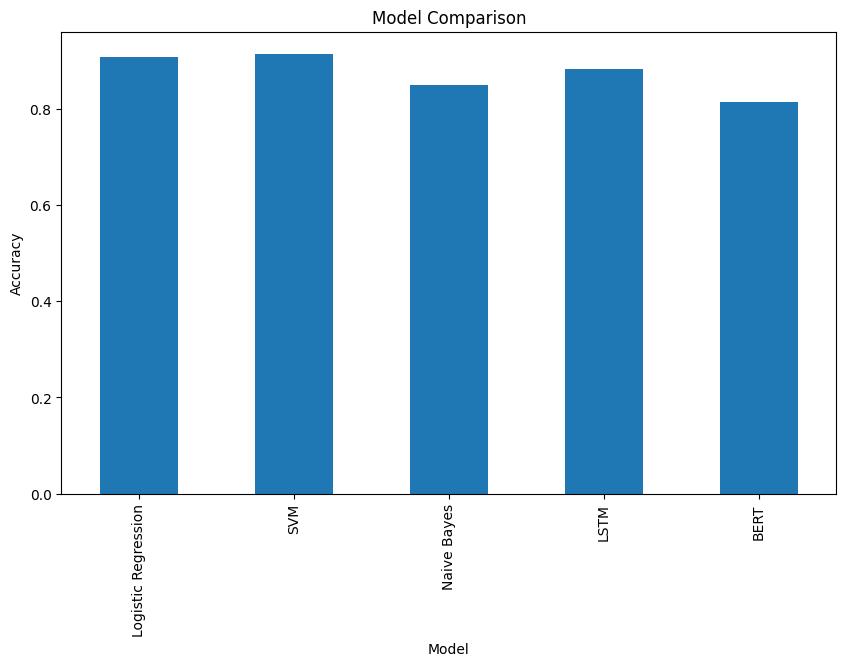

In [ ]:
# Subset predictions to match the size of y_test
y_pred_subset = y_pred[:len(y_test)]
y_pred_svm_subset = y_pred_svm[:len(y_test)]
y_pred_nb_subset = y_pred_nb[:len(y_test)]

# Compile results into a DataFrame
results = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "Naive Bayes", "LSTM", "BERT"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_subset),
        accuracy_score(y_test, y_pred_svm_subset),
        accuracy_score(y_test, y_pred_nb_subset),
        accuracy,  # LSTM accuracy
        accuracy_bert  # BERT accuracy
    ]
})

# Print results
print(results)

# Visualize results
results.plot(kind="bar", x="Model", y="Accuracy", figsize=(10, 6), legend=False)
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()


## Confusion Matrix for All Models

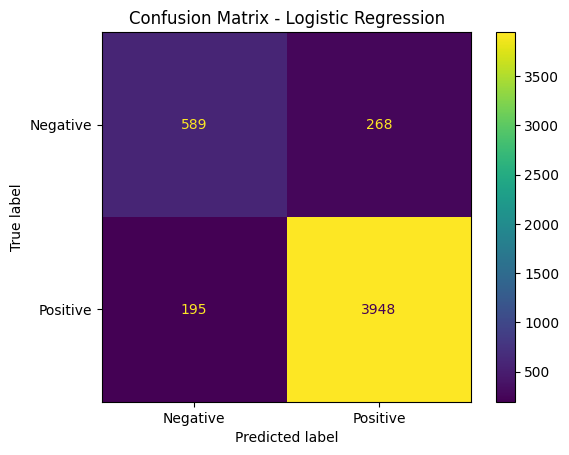

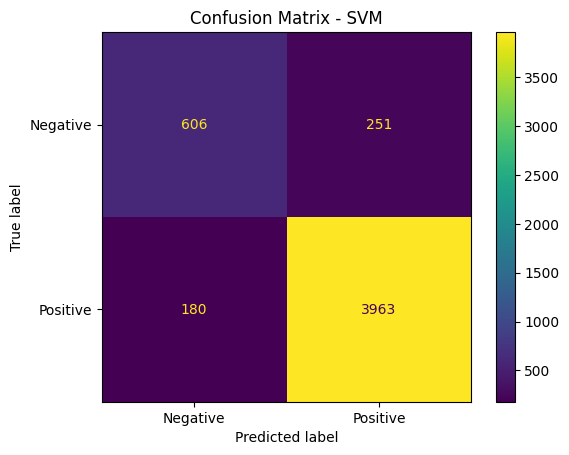

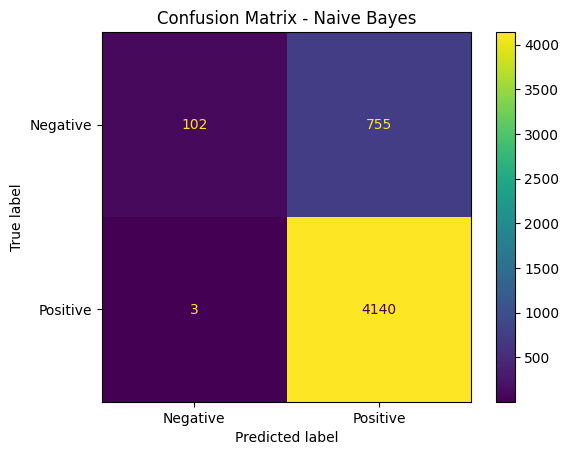

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


<ipython-input-53-76036a555d9d>:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test.replace({'positive': 1, 'negative': 0}), lstm_y_pred, display_labels=["Negative", "Positive"]


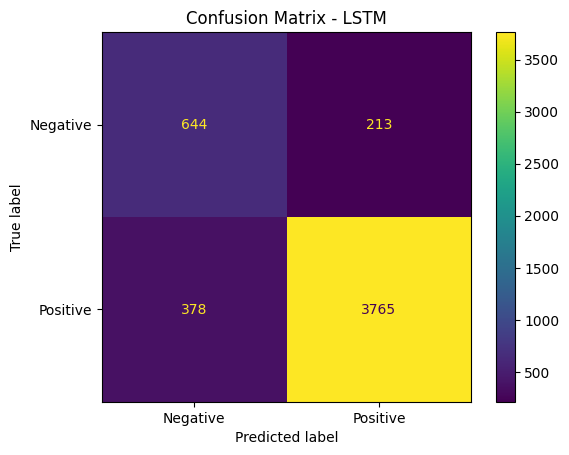

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Subset predictions to match y_test size
y_pred_subset = y_pred[:len(y_test)]
y_pred_svm_subset = y_pred_svm[:len(y_test)]
y_pred_nb_subset = y_pred_nb[:len(y_test)]

# Logistic Regression Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_subset, display_labels=["Negative", "Positive"])
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# SVM Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm_subset, display_labels=["Negative", "Positive"])
plt.title("Confusion Matrix - SVM")
plt.show()

# Naive Bayes Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb_subset, display_labels=["Negative", "Positive"])
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# LSTM Confusion Matrix
lstm_y_pred = (lstm_model.predict(X_test_padded) > 0.5).astype(int).flatten()[:len(y_test)]
ConfusionMatrixDisplay.from_predictions(
    y_test.replace({'positive': 1, 'negative': 0}), lstm_y_pred, display_labels=["Negative", "Positive"]
)
plt.title("Confusion Matrix - LSTM")
plt.show()



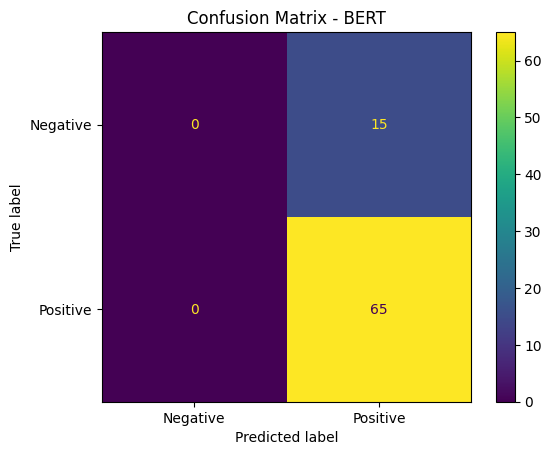

In [ ]:


# Generate confusion matrix BERT
ConfusionMatrixDisplay.from_predictions(
    y_test_binary, bert_y_pred, display_labels=["Negative", "Positive"]
)
plt.title("Confusion Matrix - BERT")
plt.show()


##Precision-Recall Curve

<ipython-input-61-ae0dd5a8d823>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test.replace({"positive": 1, "negative": 0}),


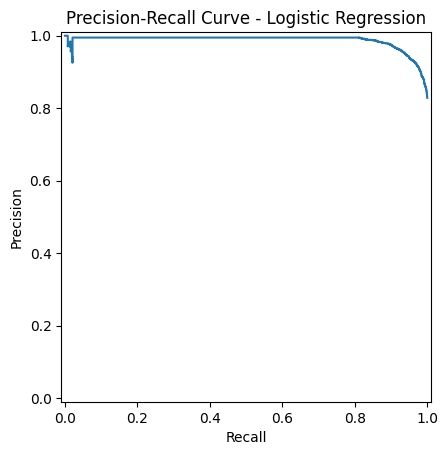

<ipython-input-61-ae0dd5a8d823>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test.replace({"positive": 1, "negative": 0}),


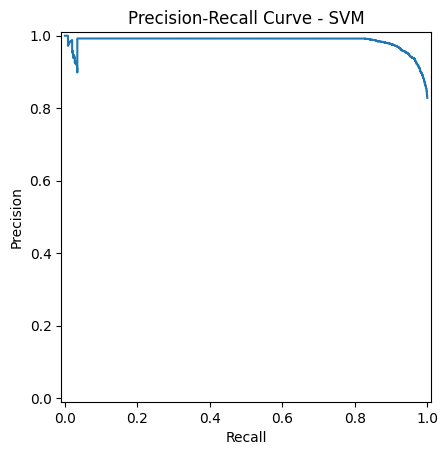

<ipython-input-61-ae0dd5a8d823>:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test.replace({"positive": 1, "negative": 0}),


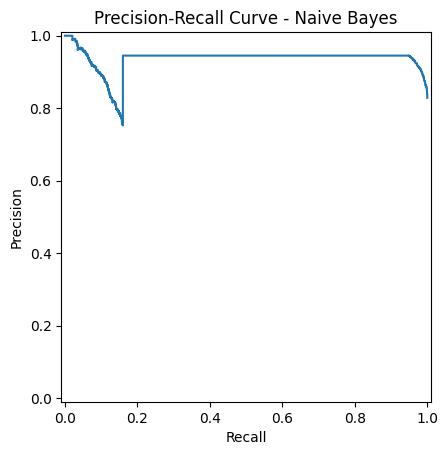

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step


<ipython-input-61-ae0dd5a8d823>:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test.replace({"positive": 1, "negative": 0}),


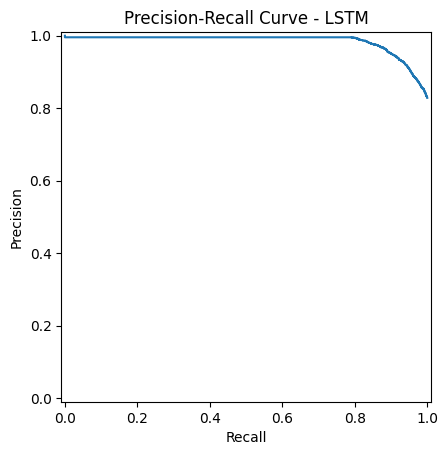

3/3 [==============================] - 11s 3s/step


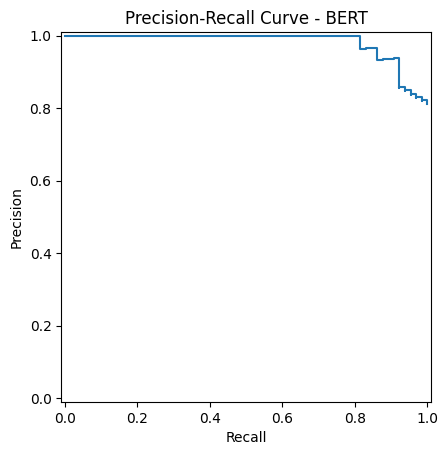

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Logistic Regression
log_probs = log_model.predict_proba(X_test_tfidf[:len(y_test)])[:, 1]  # Match size with y_test
precision_log, recall_log, _ = precision_recall_curve(
    y_test.replace({"positive": 1, "negative": 0}),
    log_probs
)
PrecisionRecallDisplay(precision=precision_log, recall=recall_log).plot()
plt.title("Precision-Recall Curve - Logistic Regression")
plt.show()

# SVM (use decision_function)
svm_scores = svm_model.decision_function(X_test_tfidf[:len(y_test)])  # Match size with y_test
precision_svm, recall_svm, _ = precision_recall_curve(
    y_test.replace({"positive": 1, "negative": 0}),
    svm_scores
)
PrecisionRecallDisplay(precision=precision_svm, recall=recall_svm).plot()
plt.title("Precision-Recall Curve - SVM")
plt.show()

# Naive Bayes
nb_probs = nb_model.predict_proba(X_test_tfidf[:len(y_test)])[:, 1]  # Match size with y_test
precision_nb, recall_nb, _ = precision_recall_curve(
    y_test.replace({"positive": 1, "negative": 0}),
    nb_probs
)
PrecisionRecallDisplay(precision=precision_nb, recall=recall_nb).plot()
plt.title("Precision-Recall Curve - Naive Bayes")
plt.show()

# LSTM
lstm_probabilities = lstm_model.predict(X_test_padded[:len(y_test)]).flatten()  # Match size with y_test
precision_lstm, recall_lstm, _ = precision_recall_curve(
    y_test.replace({"positive": 1, "negative": 0}),
    lstm_probabilities
)
PrecisionRecallDisplay(precision=precision_lstm, recall=recall_lstm).plot()
plt.title("Precision-Recall Curve - LSTM")
plt.show()

# BERT

# Get logits (predicted scores) from the BERT model
bert_y_pred_logits = bert_model.predict({
    "input_ids": X_test_enc_subset["input_ids"],
    "attention_mask": X_test_enc_subset["attention_mask"]
}).logits

# Convert y_test to binary format
y_test_binary = y_test[:80].map({'positive': 1, 'negative': 0}).values

# Get probabilities for the positive class (class 1)
bert_y_prob = np.exp(bert_y_pred_logits[:, 1]) / np.exp(bert_y_pred_logits).sum(axis=1)

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test_binary, bert_y_prob)

# Plot the precision-recall curve
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot()
plt.title("Precision-Recall Curve - BERT")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()



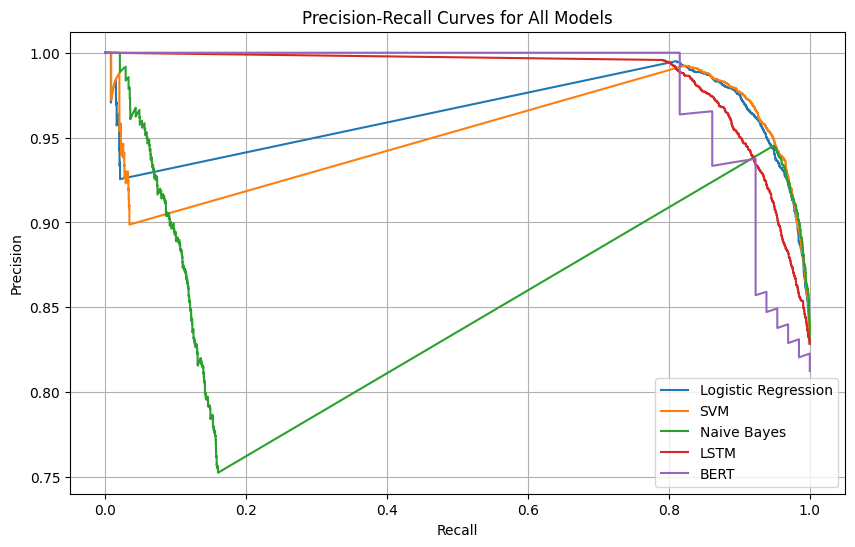

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(recall_log, precision_log, label="Logistic Regression")
plt.plot(recall_svm, precision_svm, label="SVM")
plt.plot(recall_nb, precision_nb, label="Naive Bayes")
plt.plot(recall_lstm, precision_lstm, label="LSTM")
# Assign the calculated precision and recall values to recall_bert and precision_bert
recall_bert = recall # Assign the recall values calculated for BERT
precision_bert = precision # Assign the precision values calculated for BERT
plt.plot(recall_bert, precision_bert, label="BERT")  # Now use the assigned variables

# Customize the plot
plt.title("Precision-Recall Curves for All Models")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.show()

 ## All Models with Validation and Visualizations

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
<ipython-input-80-977813ccbfac>:71: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lstm_model.fit(X_train_padded, y_train.replace({"positive": 1, "negative": 0}), epochs=3, batch_size=32)


157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.8255 - loss: 0.3488
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 71ms/step - accuracy: 0.9021 - loss: 0.2192
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.9481 - loss: 0.1358


<ipython-input-80-977813ccbfac>:72: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loss, accuracy_lstm = lstm_model.evaluate(X_test_padded, y_test.replace({"positive": 1, "negative": 0}))


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8840 - loss: 0.2641
2/2 [==============================] - 8s 1s/step - loss: 7.6949 - accuracy: 0.8000


<ipython-input-80-977813ccbfac>:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette="Blues_d")


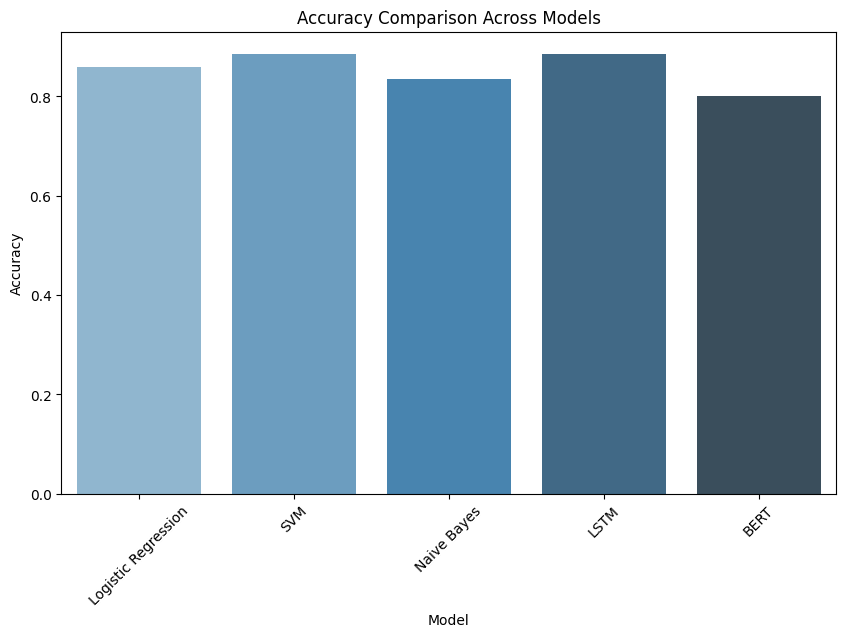

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step
157/157 [==============================] - 2256s 14s/step


In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers.legacy import Adam  # Fix for Adam optimizer compatibility
from transformers import BertTokenizer, TFBertForSequenceClassification

# Subset dataset for demonstration
# Replace `X_train`, `y_train`, `X_test`, `y_test` with your actual data
X_train = X_train[:5000]
y_train = y_train[:5000]
X_test = X_test[:5000]
y_test = y_test[:5000]

# Prepare results dictionary
model_results = {}

# Ensure data consistency
assert len(X_train) == len(y_train), "Training data sizes do not match"
assert len(X_test) == len(y_test), "Test data sizes do not match"

# TF-IDF for Logistic Regression, SVM, and Naive Bayes
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_tfidf, y_train)
y_pred_log = log_model.predict(X_test_tfidf)
model_results["Logistic Regression"] = accuracy_score(y_test, y_pred_log)

# SVM
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)
model_results["SVM"] = accuracy_score(y_test, y_pred_svm)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
model_results["Naive Bayes"] = accuracy_score(y_test, y_pred_nb)

# Tokenization and Padding for LSTM
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_padded = pad_sequences(X_train_seq, maxlen=100)
X_test_padded = pad_sequences(X_test_seq, maxlen=100)

# LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_padded, y_train.replace({"positive": 1, "negative": 0}), epochs=3, batch_size=32)
loss, accuracy_lstm = lstm_model.evaluate(X_test_padded, y_test.replace({"positive": 1, "negative": 0}))
model_results["LSTM"] = accuracy_lstm

# BERT Model
# Reduce subset size
# Reduce subset size for faster execution
subset_size = 40  # Reduce to smaller size
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Reduce test size for evaluation
X_test_subset = X_test[:40]
y_test_subset = y_test[:40]

# Tokenize data for BERT
X_train_enc_subset = bert_tokenizer(
    list(X_train_subset), truncation=True, padding=True, max_length=32, return_tensors="tf"
)
X_test_enc_subset = bert_tokenizer(
    list(X_test_subset), truncation=True, padding=True, max_length=32, return_tensors="tf"
)

# Train the BERT model
history_bert = bert_model.fit(
    {
        "input_ids": X_train_enc_subset["input_ids"],
        "attention_mask": X_train_enc_subset["attention_mask"]
    },
    y_train_subset.map({'positive': 1, 'negative': 0}).values,
    epochs=1,
    batch_size=8  # Smaller batch size reduces steps
)

# Evaluate on the subset
loss_bert, accuracy_bert = bert_model.evaluate(
    {
        "input_ids": X_test_enc_subset["input_ids"],
        "attention_mask": X_test_enc_subset["attention_mask"]
    },
    y_test_subset.map({'positive': 1, 'negative': 0}).values
)

model_results["BERT"] = accuracy_bert

# Summarize results
results_df = pd.DataFrame.from_dict(model_results, orient='index', columns=['Accuracy'])

# Accuracy Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['Accuracy'], palette="Blues_d")
plt.title("Accuracy Comparison Across Models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

# Confusion Matrices
models = {
    "Logistic Regression": y_pred_log,
    "SVM": y_pred_svm,
    "Naive Bayes": y_pred_nb,
    "LSTM": lstm_model.predict(X_test_padded).flatten().round(),  # Convert probabilities to binary
    "BERT": bert_model.predict(X_test_enc["input_ids"]).logits.argmax(axis=1)  # BERT predictions
}

